<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)
boston_df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


#### Add your code below following the instructions given in the course to complete the peer graded assignment


# Task 1: Familiarize yourself with the dataset 

The following describes the dataset variables:

·      CRIM - per capita crime rate by town

·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

·      INDUS - proportion of non-retail business acres per town.

·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

·      NOX - nitric oxides concentration (parts per 10 million)

·      RM - average number of rooms per dwelling

·      AGE - proportion of owner-occupied units built prior to 1940

·      DIS - weighted distances to five Boston employment centres

·      RAD - index of accessibility to radial highways

·      TAX - full-value property-tax rate per $10,000

·      PTRATIO - pupil-teacher ratio by town

·      LSTAT - % lower status of the population

·      MEDV - Median value of owner-occupied homes in $1000's

In [5]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.4 KB


In [7]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


# Task 2: Generate Descriptive Statistics and Visualizations

For all visualizations, please include a title in each graph and appropriate labels

Generate the following and explain your findings:

For the "Median value of owner-occupied homes" provide a boxplot

Provide a  bar plot for the Charles river variable

Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

Create a histogram for the pupil to teacher ratio variable

### 1) For the "Median value of owner-occupied homes" provide a boxplot

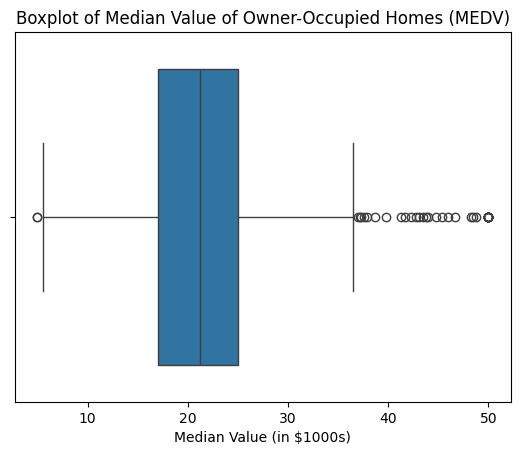

In [17]:
sns.boxplot(x=boston_df['MEDV'])
plt.title('Boxplot of Median Value of Owner-Occupied Homes (MEDV)')
plt.xlabel('Median Value (in $1000s)')
plt.show()

### 2)  Provide a  bar plot for the Charles river variable

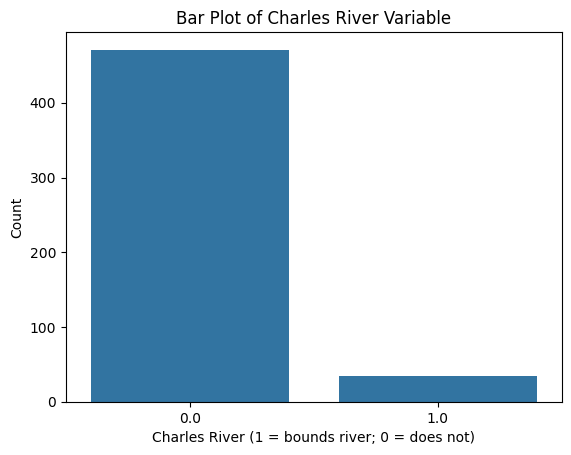

In [13]:
sns.countplot(x='CHAS', data=boston_df)
plt.title('Bar Plot of Charles River Variable')
plt.xlabel('Charles River (1 = bounds river; 0 = does not)')
plt.ylabel('Count')
plt.show()

### 3)  Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

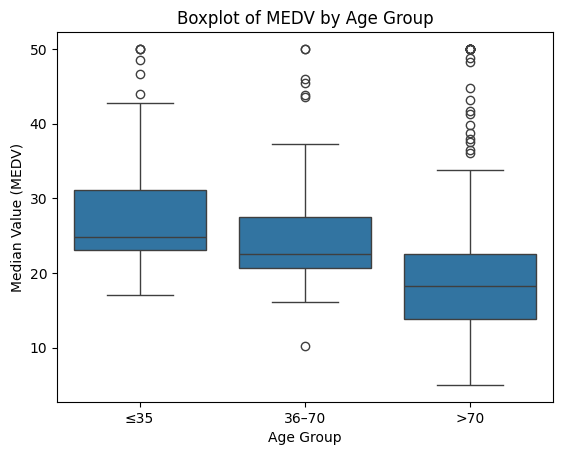

In [14]:
# Discretize the age variable into three groups
boston_df['AGE_GROUP'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, 100], 
                                labels=['≤35', '36–70', '>70'])

sns.boxplot(x='AGE_GROUP', y='MEDV', data=boston_df)
plt.title('Boxplot of MEDV by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Median Value (MEDV)')
plt.show()


### 4） Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

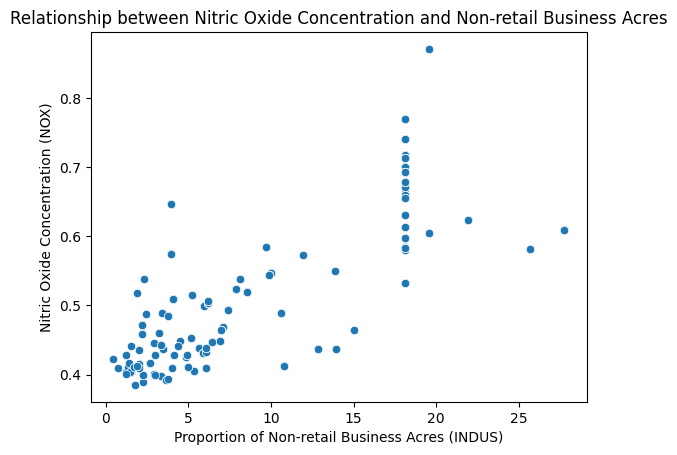

In [15]:
sns.scatterplot(x='INDUS', y='NOX', data=boston_df)
plt.title('Relationship between Nitric Oxide Concentration and Non-retail Business Acres')
plt.xlabel('Proportion of Non-retail Business Acres (INDUS)')
plt.ylabel('Nitric Oxide Concentration (NOX)')
plt.show()

Observation:

There is a positive correlation: as the proportion of non-retail business acres (INDUS) increases, the Nitric Oxide concentration (NOX) tends to increase as well.

Especially around INDUS = 18–20, NOX values seem to cluster at higher levels (around 0.6–0.9).

At lower INDUS values (e.g., 0–10), NOX tends to remain low (mostly between 0.4–0.6).

The relationship is not perfectly linear, but the trend is clear—areas with more industrial (non-retail) land tend to have higher air pollution (as represented by NOX).

### 5） Create a histogram for the pupil to teacher ratio variable

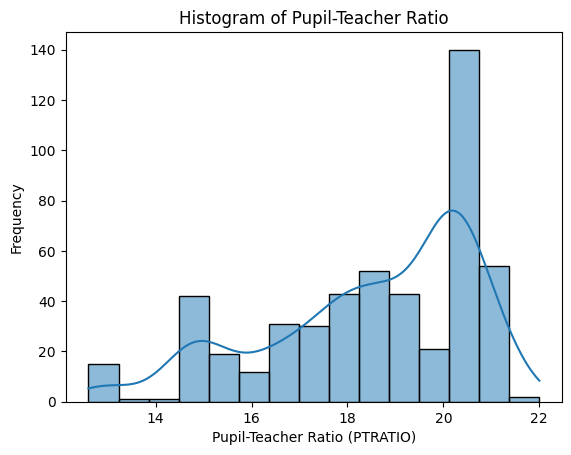

In [16]:
sns.histplot(boston_df['PTRATIO'], bins=15, kde=True)
plt.title('Histogram of Pupil-Teacher Ratio')
plt.xlabel('Pupil-Teacher Ratio (PTRATIO)')
plt.ylabel('Frequency')
plt.show()

# Task 3: Use the appropriate tests to answer the questions provided.

For each of the following questions;

Q1: Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

Q2: Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

Q3: Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

Q4: What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)


Be sure to:

State your hypothesis.

Use α = 0.05

Perform the test Statistics.

State the conclusion from the test.

## Q1: (T-test for independent samples)

Hypothesis:

H₀: There is no significant difference in the median value of houses (MEDV) between houses bounded by the Charles river (CHAS=1) and those not bounded (CHAS=0).

H₁: There is a significant difference in the median value.

Conclusion:

P-value: 7.390623170519905e-05 < 0.05

Reject H0: There is a significant difference.

In [18]:
from scipy.stats import ttest_ind

# H0: no significant difference；H1: significant difference
medv_river = boston_df[boston_df['CHAS'] == 1]['MEDV']
medv_noriver = boston_df[boston_df['CHAS'] == 0]['MEDV']

t_stat, p_val = ttest_ind(medv_river, medv_noriver)

print("T-statistic:", t_stat)
print("P-value:", p_val)

if p_val < 0.05:
    print("Reject H0: There is a significant difference.")
else:
    print("Fail to reject H0: No significant difference.")


T-statistic: 3.996437466090509
P-value: 7.390623170519905e-05
Reject H0: There is a significant difference.


## Q2: (ANOVA)

Hypothesis:

H₀: The mean MEDV is the same across all three age groups.

H₁: At least one age group has a different mean MEDV.

Conclusion:

At α = 0.05, the p-value from the ANOVA test is 1.71e-15, which is far less than the threshold. Therefore, we reject the null hypothesis and conclude that there is a statistically significant difference in the median house values (MEDV) across different age groups of homes built prior to 1940.


In [20]:
from scipy.stats import f_oneway

boston_df['AGE_GROUP'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, 100], labels=['≤35', '36–70', '>70'])

group1 = boston_df[boston_df['AGE_GROUP'] == '≤35']['MEDV']
group2 = boston_df[boston_df['AGE_GROUP'] == '36–70']['MEDV']
group3 = boston_df[boston_df['AGE_GROUP'] == '>70']['MEDV']

f_stat, p_val = f_oneway(group1, group2, group3)
print("F-statistic:", f_stat)
print("P-value:", p_val)

F-statistic: 36.40764999196599
P-value: 1.7105011022702984e-15


## Q3: (Pearson Correlation)

Hypothesis:

H₀: There is no linear relationship between NOX and INDUS.

H₁: There is a linear relationship.
    
Conclusion:

Using a significance level of α = 0.05, the Pearson correlation test yields a correlation coefficient of 0.76 and a p-value of 7.91e-98. Since the p-value is much smaller than 0.05, we reject the null hypothesis and conclude that there is a strong and statistically significant positive linear relationship between nitric oxide concentrations (NOX) and the proportion of non-retail business acres (INDUS) in the town.

In [21]:
from scipy.stats import pearsonr

corr, p_val = pearsonr(boston_df['NOX'], boston_df['INDUS'])
print("Correlation Coefficient:", corr)
print("P-value:", p_val)

Correlation Coefficient: 0.7636514469209192
P-value: 7.913361061210442e-98


## Q4: (Regression analysis)

Hypothesis:

H₀: The coefficient of DIS is zero (no impact on MEDV).

H₁: The coefficient of DIS is not zero (DIS has an impact on MEDV).

Conclusion:

At α = 0.05, the p-value for the variable DIS is 0.000, which is less than 0.05. Therefore, we reject the null hypothesis and conclude that the weighted distance to employment centers has a statistically significant positive impact on the median value of owner-occupied homes (MEDV). Specifically, for each additional unit of distance, the median home value increases by approximately 1.09 thousand dollars, holding all else constant.

In [22]:
import statsmodels.api as sm

X = sm.add_constant(boston_df[['DIS']])
y = boston_df['MEDV']
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sun, 03 Aug 2025   Prob (F-statistic):           1.21e-08
Time:                        14:01:08   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0